In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

### Loading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
# Creating the feature matrix
X = df.drop('label', axis = 1)

In [4]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [5]:
# Get the dependent faeatures
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [6]:
# Shape of the data
df.shape

(20800, 5)

In [7]:
# Removing the NaN values
df = df.dropna()

In [8]:
df.shape

(18285, 5)

In [9]:
messages = df.copy()

In [10]:
# Resetting the indices after the removal of NaN values
messages.reset_index(inplace = True)

In [11]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
# 4th News Headline with it's entire text present in the data
print(messages['title'][3])
print(messages['text'][3])

15 Civilians Killed In Single US Airstrike Have Been Identified
Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilians are being killed by American airstrikes in Afghanistan is now higher than it was in 2014 when the US was engaged in active combat operations.   Photo of Hellfire missiles being loaded onto a US military Reaper drone in Afghanistan by Staff Sgt. Brian Ferguson/U.S. Air Force. 
The Bureau has been able to identify 15 civilians killed in a single US drone strike in Afghanistan last month – the biggest loss of civilian life in one strike since the attack on the Medecins Sans Frontieres hospital (MSF) last October. 
The US claimed it had conducted a “counter-terrorism” strike against Islamic State (IS) fighters when it hit Nangarhar province with missiles on September 28. But the next day the United Nations issued an unusually rapid and strong statement saying the strike had killed 15 civilians and injured 13 others who had gather

In [18]:
# Import the required libraries
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

### Pre-processing the text data

In [19]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)   

In [20]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

### Bag of Words model

In [31]:
cv = CountVectorizer(max_features = 4000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [32]:
X.shape

(18285, 4000)

In [33]:
y = messages['label']

In [34]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [36]:
# Top 40 feature names
cv.get_feature_names()[:40]

['abandon',
 'abc',
 'abduct',
 'abe',
 'abedin',
 'abort',
 'abroad',
 'absolut',
 'abus',
 'abus new',
 'abus new york',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accident',
 'accord',
 'account',
 'accus',
 'acknowledg',
 'acquit',
 'across',
 'act',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit']

In [37]:
# Parameters we are using in the model
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 4000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [39]:
# So now my dataset looks something like this-:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names())
count_df.head()

,abandon,abc,abduct,abe,abedin,abort,abroad,absolut,abus,abus new,...,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Creating confusion Matrix
%pylab inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Populating the interactive namespace from numpy and matplotlib


### Using Multinomial Naive Bayes Classifier


Accuracy:  0.8993802406124681
Confusion matrix, without normalization


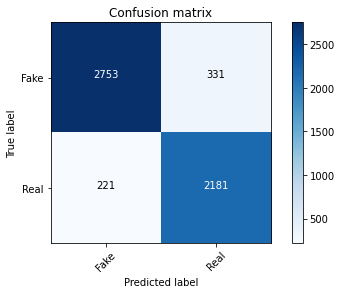

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools

classifier = MultinomialNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
print('\nAccuracy: ', score)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

### Using Passive Aggressive Classifier 


Accuracy:  0.9112285818446956
Confusion matrix, without normalization


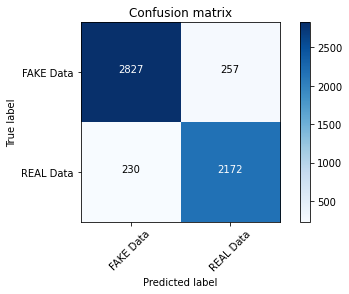

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(n_iter_no_change = 50)
pac.fit(X_train, y_train)
pred = pac.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("\nAccuracy: ",score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [46]:
# Get Features names
feature_names = cv.get_feature_names()

In [62]:
# Coefficients
# The more negative the value is, the more fake is that word
classifier.coef_[0]

array([-9.06207236, -8.59206873, -9.06207236, ..., -8.27361499,
       -8.72560012, -9.28521591])

In [63]:
# Most real words
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9357302534988534, 'trump'),
 (-4.227379011040739, 'hillari'),
 (-4.318880871421613, 'clinton'),
 (-4.830868610367782, 'elect'),
 (-5.088013958959481, 'new'),
 (-5.182572541584493, 'comment'),
 (-5.216189152383478, 'video'),
 (-5.343634098951599, 'war'),
 (-5.343634098951599, 'us'),
 (-5.343634098951599, 'hillari clinton'),
 (-5.378205443016688, 'fbi'),
 (-5.393395608510663, 'vote'),
 (-5.4785534168509695, 'email'),
 (-5.535711830690918, 'world'),
 (-5.571643839916981, 'obama'),
 (-5.660874973644924, 'donald'),
 (-5.694776525320606, 'donald trump'),
 (-5.708665637481273, 'russia'),
 (-5.811697863379508, 'day'),
 (-5.811697863379508, 'america')]

In [64]:
# Most fake words
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.67151026774118, 'abe'),
 (-10.67151026774118, 'abroad'),
 (-10.67151026774118, 'abus new'),
 (-10.67151026774118, 'abus new york'),
 (-10.67151026774118, 'act new'),
 (-10.67151026774118, 'act new york'),
 (-10.67151026774118, 'advic'),
 (-10.67151026774118, 'ail'),
 (-10.67151026774118, 'ali'),
 (-10.67151026774118, 'america breitbart'),
 (-10.67151026774118, 'america new york'),
 (-10.67151026774118, 'ami'),
 (-10.67151026774118, 'ami schumer'),
 (-10.67151026774118, 'amp'),
 (-10.67151026774118, 'assail'),
 (-10.67151026774118, 'athlet'),
 (-10.67151026774118, 'attack breitbart'),
 (-10.67151026774118, 'attack new'),
 (-10.67151026774118, 'attack new york'),
 (-10.67151026774118, 'attend')]